#### Module 3- Simple Plots and Histograms
author: Radley Rigonan

This module demonstrates basic usage of matplotlib to create scatter plots, line graphs, and histograms.  These are fundamental formats that can be used to display information in a clear and organized manner.

In this module, I will be using etch.csv AND lbl.csv which can be accessed from the following links.
https://radwatch.berkeley.edu/sites/default/files/dosenet/etch.csv
http://radwatch.berkeley.edu/sites/default/files/dosenet/lbl.csv

In [1]:
%matplotlib inline
    # Enables IPython matplotlib mode which allows plots to be shown in 
    # markdown sections. Not necessary in functionality of code.

In [2]:
import csv
import io
import urllib.request            
import matplotlib.pyplot as plt
    # matplotlib is one of the most frequently used Python extensions for plotting.  
    # The plt identifier for matplotlib.pyplot is a convention used in many codes.

First we want to import two sets of data from DoseNet:

You should recognize the following steps!  If you are not famiar with importing data from a DDL, then check previous modules on retrieving and importing CSVs.

In [3]:
def importwebCSV(url):
    response = urllib.request.urlopen(url)
    reader = csv.reader(io.TextIOWrapper(response))  
    datetime = []    
    cpm = []
    line = 0
    for row in reader:
        if line != 0:
            datetime.append(row[0])
            cpm.append(float(row[6]))
        line += 1    
        # Python syntax for line = line + 1 (+1 to current value for line)
    return (datetime,cpm)

url_etch = 'https://radwatch.berkeley.edu/sites/default/files/dosenet/etch.csv' 
datetime_etch, cpm_etch = importwebCSV(url_etch)

url_lbl = 'http://radwatch.berkeley.edu/sites/default/files/dosenet/lbl.csv' 
datetime_lbl, cpm_lbl = importwebCSV(url_lbl)

By default, the matplotlib.pyplot.plot command plots data points in a line graph.  If you input a single list of floating point values into plt.plot, it will plot the list on the y-axis.  The following commands create a simple line graph with our CPM data.

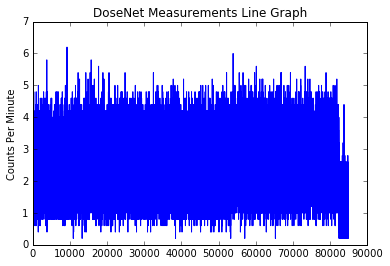

In [4]:
def line(cpm):
    plt.plot(cpm)
    plt.ylabel('Counts Per Minute')                     # label the y-axis
    plt.title('DoseNet Measurements Line Graph')        # put a title!
    plt.show()

line(cpm_etch)

Alternatively, you can create a scatter plot by with a modifier in plt.plot's inputs. The following module creates a simple scatter plot with CPM data from our device in Lawrence Berkeley.

For more insight into line, axes, and other plot modifiers, matplotlib's official website contains detailed documentation on plotting and graphic design.

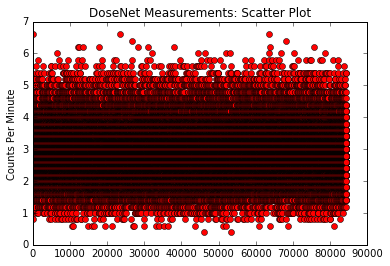

In [5]:
def scatter(cpm):
    plt.plot(cpm,'ro')
        # The 'ro' modifier after cpm_lbl does two things: 
        # 'r' changes the color to red and 'o' creates points instead of lines
    plt.ylabel('Counts Per Minute')
    plt.title('DoseNet Measurements: Scatter Plot')    
    plt.show()   

scatter(cpm_lbl)

Histograms are a graphics that depict distributions of data.  Histograms are incredibly useful in statistical analysis of raw data.  Key pieces of information conveyed by a histogram include: mean, standard deviation, and data stability.

The following commands demonstrate the plt.hist command.  The plt.hist command organizes a list of data into a histogram, enabling us to streamline a process that can be extremely tedious by hand.

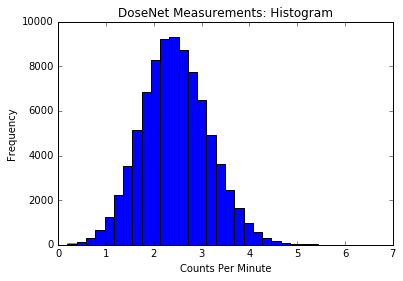

In [6]:
def histogram(cpm):
    plt.hist(cpm,bins=31)
    plt.ylabel('Frequency')
    plt.xlabel('Counts Per Minute')
    plt.title('DoseNet Measurements: Histogram')
    plt.savefig('test.png',dpi=300)
    plt.show()

histogram(cpm_etch)

The plot command can be used in conjunction with a variety of other commands to create complex graphics.  Two straightforward examples of this are subplots and overlaid plots.  Subplots allow multiple plots to be placed onto single canvas.  Similarly, there are also methods to place multiple sets of data on a single axis to create overlapping plots.

The following example combines everything that had been introduced in this module and incorporates subplots and overlapping plots.

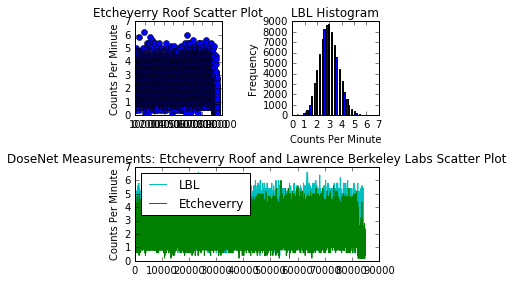

In [7]:
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
def subplot_overlay(cpm1, cpm2, cpm3, cpm4):
    plt.subplot(2,2,1)    
    # This means you are making a subplot with 2 rows, 2 columns, and are 
    # currently working on the 1st one (plot in top left)
    plt.plot(cpm1,'o')
    plt.ylabel('Counts Per Minute')
    plt.title('Etcheverry Roof Scatter Plot')
    
    plt.subplot(2,2,2)    # subplot with 2 rows, 2 columns, 2nd plot (top right)
    plt.hist(cpm_lbl,bins=50)
    plt.ylabel('Frequency')
    plt.xlabel('Counts Per Minute')
    plt.title('LBL Histogram')

    plt.subplot(2,1,2)   
    # 2 rows, 1 column, 2nd plot.  This plot will be placed on the 2nd plot 
    # (bottom-most plot) as if it were a 2-by-1 grid
    plot1, = plt.plot(cpm3,'c', label='LBL')      
    plot2, = plt.plot(cpm4,'g', label='Etcheverry')    
    # Note: The comma after the variable is necessary or plt.legend will fail
    plt.ylabel('Counts Per Minute')
    plt.title('DoseNet Measurements: Etcheverry Roof and Lawrence Berkeley Labs Scatter Plot')
    plt.legend(loc='best')  
    # Giving the plots labels enables us to create a legend
    plt.tight_layout()  
    # Tightens title and axes labels and prevents overlapping
    
    plt.show()
    
subplot_overlay(cpm_etch, cpm_lbl, cpm_lbl, cpm_etch)

This was a short rundown of matplotlib's capabilities.  If you are interested in creating a more professional plot, the next module will take a more in depth look at manipulating plots to create a compelling representation of RadWatch's weather data.